# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Missing value counts per column:


patient_id               0
age                      0
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
Name: missing_count, dtype: int64


Percentage of missing values per column:


patient_id             0.00
age                    0.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.00
adherence_pct         14.67
dropout                0.00
Name: missing_count, dtype: float64


Missing data summary (sorted by count):


,Missing Count,Missing %
adherence_pct,1467,14.67
cholesterol_hdl,554,5.54
cholesterol_total,554,5.54
cholesterol_ldl,554,5.54
bmi,438,4.38
systolic_bp,414,4.14
diastolic_bp,414,4.14
glucose_fasting,369,3.69
age,0,0.00
patient_id,0,0.00



Found 8 columns with missing values:


,Missing Count,Missing %
adherence_pct,1467,14.67
cholesterol_hdl,554,5.54
cholesterol_total,554,5.54
cholesterol_ldl,554,5.54
bmi,438,4.38
systolic_bp,414,4.14
diastolic_bp,414,4.14
glucose_fasting,369,3.69



Missing data visualization:


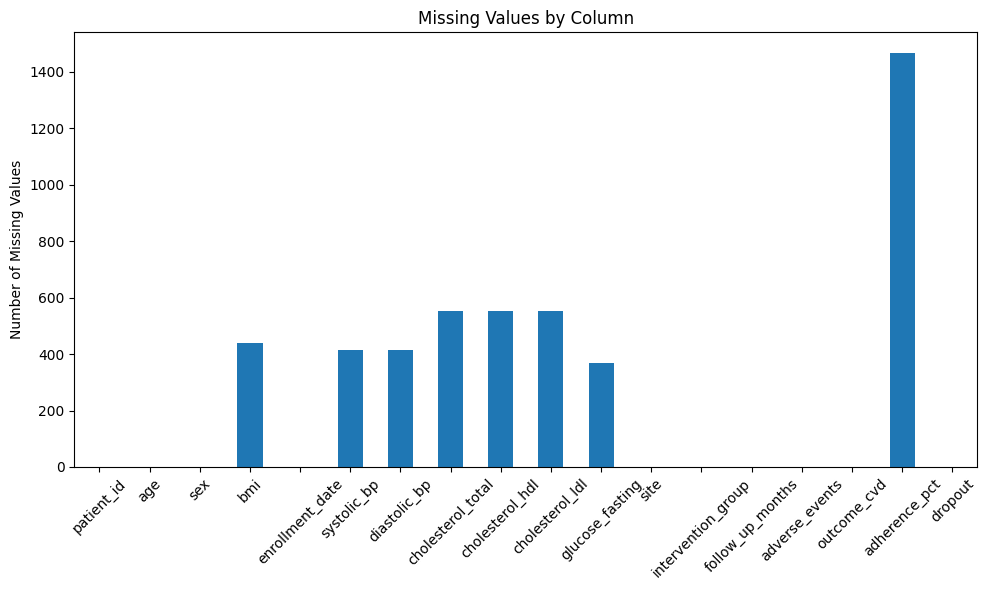

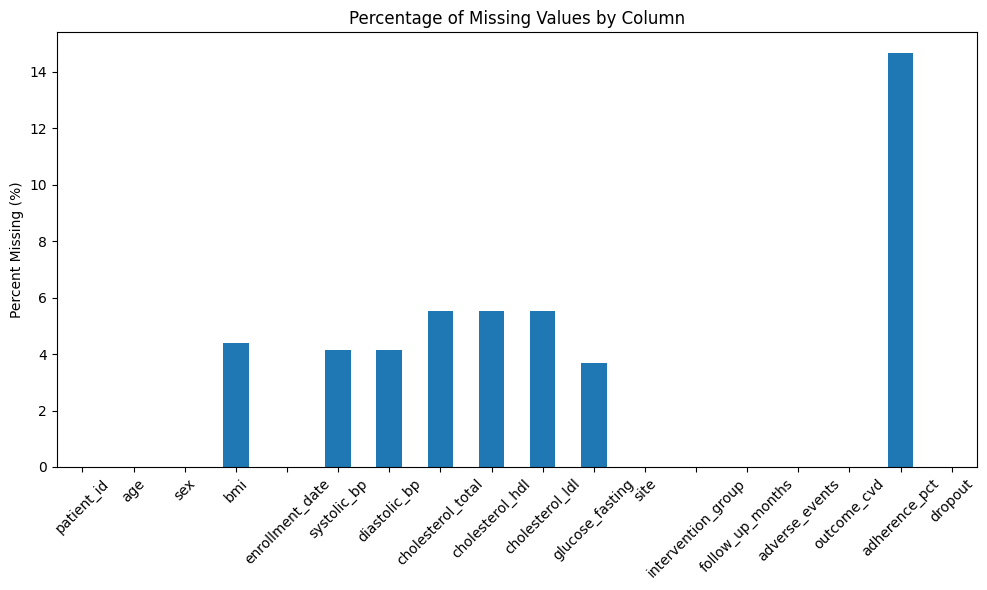

In [2]:
# Part 1

# 1. 
missing_counts = detect_missing(df)
print("Missing value counts per column:")
display(missing_counts)

# 2. 
total_rows = len(df)
missing_pct = (missing_counts / total_rows * 100).round(2)
print("\nPercentage of missing values per column:")
display(missing_pct)

# 3. Create a summary DataFrame
summary_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct
})
#
summary_df = summary_df.sort_values('Missing Count', ascending=False)
print("\nMissing data summary (sorted by count):")
display(summary_df)

# 4.
cols_with_missing = summary_df[summary_df['Missing Count'] > 0]
print(f"\nFound {len(cols_with_missing)} columns with missing values:")
display(cols_with_missing)

# 5.
print("\nMissing data visualization:")
visualize_missing_data(missing_counts)

# Add a percentage-based visualization
plt.figure(figsize=(10, 6))
missing_pct.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xticks(rotation=45)
plt.ylabel('Percent Missing (%)')
plt.tight_layout()
plt.show()

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
# Part 2: Compare imputation strategies for 'cholesterol_total'
col = 'cholesterol_total'

# Original stats
orig_mean = df[col].mean()
orig_median = df[col].median()
orig_na = df[col].isna().sum()

# Strategy A: fill with mean using utility
df_mean = df.copy()
df_mean = fill_missing(df_mean, col, strategy='mean')
mean_after_mean = df_mean[col].mean()
na_after_mean = df_mean[col].isna().sum()
filled_mean_count = orig_na - na_after_mean

# Strategy B: fill with median using utility
df_median = df.copy()
df_median = fill_missing(df_median, col, strategy='median')
mean_after_median = df_median[col].mean()
median_after_median = df_median[col].median()
na_after_median = df_median[col].isna().sum()
filled_median_count = orig_na - na_after_median

# Strategy C: forward fill (ffill)
df_ffill = df.copy()
df_ffill[col] = df_ffill[col].fillna(method='ffill')
na_after_ffill = df_ffill[col].isna().sum()
filled_ffill_count = orig_na - na_after_ffill
mean_after_ffill = df_ffill[col].mean()
median_after_ffill = df_ffill[col].median()

# Build summary table
summary = pd.DataFrame({
    'strategy': ['original','fill_mean','fill_median','ffill'],
    'mean': [orig_mean, mean_after_mean, mean_after_median, mean_after_ffill],
    'median': [orig_median, df_mean[col].median(), median_after_median, median_after_ffill],
    'na_remaining': [orig_na, na_after_mean, na_after_median, na_after_ffill],
    'filled_count': [0, filled_mean_count, filled_median_count, filled_ffill_count]
}).set_index('strategy')

print('Imputation comparison for column:', col)
display(summary)

# Show a few example rows where values were filled for one method
print('\nExample rows where original was missing but filled by mean:')
mask = df[col].isna() & df_mean[col].notna()
display(df_mean.loc[mask].head())


Imputation comparison for column: cholesterol_total


C:\Users\matee\AppData\Local\Temp\ipykernel_25416\776666668.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill[col] = df_ffill[col].fillna(method='ffill')


,mean,median,na_remaining,filled_count
strategy,,,,
original,178.039488,177.000000,554,0
fill_mean,178.039488,178.039488,0,554
fill_median,177.981900,177.000000,0,554
ffill,178.070500,177.000000,0,554



Example rows where original was missing but filled by mean:


,patient_id,age,sex,bmi,enrollment_date,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,site,intervention_group,follow_up_months,adverse_events,outcome_cvd,adherence_pct,dropout
15,P00016,60,Female,30.0,2023-04-19,104.0,71.0,178.039488,NaN,NaN,105.0,Site D,Treatment B,9,0,No,20.0,No
26,P00027,95,Male,24.3,2022-09-03,116.0,82.0,178.039488,NaN,NaN,83.0,SITE B,Control,16,0,No,34.0,No
39,P00040,83,F,30.7,2023-04-16,132.0,78.0,178.039488,NaN,NaN,97.0,site e,treatment a,9,1,No,NaN,Yes
69,P00070,100,F,27.8,2022-02-27,106.0,60.0,178.039488,NaN,NaN,81.0,SITE C,Contrl,22,0,Yes,NaN,Yes
107,P00108,85,M,23.6,2023-06-01,121.0,66.0,178.039488,NaN,NaN,79.0,SITE D,TREATMENT B,7,1,No,49.0,No


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
# Part 3: Dropping missing data

# 1. Drop rows where ANY column has missing data
rows_any = df.dropna()
print('Rows remaining after dropping any NA:', len(rows_any))

# 2. Drop rows where 'age' or 'bmi' have missing values
rows_age_bmi = df.dropna(subset=['age','bmi'])
print("Rows remaining after dropping NA in ['age','bmi']:", len(rows_age_bmi))

# 3. Compare percent retained
print('\nPercent retained:')
print('Original rows:', len(df))
print('Drop any NA retained %:', round(len(rows_any)/len(df)*100,2))
print("Drop age/bmi NA retained %:", round(len(rows_age_bmi)/len(df)*100,2))


Rows remaining after dropping any NA: 7133
Rows remaining after dropping NA in ['age','bmi']: 9562

Percent retained:
Original rows: 10000
Drop any NA retained %: 71.33
Drop age/bmi NA retained %: 95.62


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [5]:
import numpy as np
import pandas as pd

# Strategy: use median for skew-prone columns, mean for others, mode for categorical.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
clean = df.copy()

# --- 1. Drop Rows Missing Critical Data ---
# Columns we consider critical: patient_id, age
# Drop rows missing patient_id or age
clean = clean.dropna(subset=['patient_id','age'])

# --- 2. Impute Numeric Columns ---

# Impute numeric columns: use median for skew-prone columns
# (Add the column from your image analysis here if it's not already listed!)
median_cols = ['bmi','cholesterol_total','cholesterol_hdl','cholesterol_ldl']

for c in median_cols:
    if c in clean.columns and clean[c].isnull().any():
        # Using standard Pandas median imputation
        median_value = clean[c].median()
        clean[c].fillna(median_value, inplace=True)
        # If using your custom function: clean = fill_missing(clean, c, strategy='median')

# Impute all other numeric columns using the mean
mean_cols = [c for c in numeric_cols if c not in median_cols + ['patient_id','age']]

for c in mean_cols:
    if c in clean.columns and clean[c].isnull().any():
        # Using standard Pandas mean imputation
        mean_value = clean[c].mean()
        clean[c].fillna(mean_value, inplace=True)
        # If using your custom function: clean = fill_missing(clean, c, strategy='mean')

# --- 3. Impute Categorical Columns (Best Practice: Use Mode) ---

categorical_cols = clean.select_dtypes(include=['category', 'object']).columns.tolist()

# Exclude 'enrollment_date' if it was converted to datetime (it should be)
if 'enrollment_date' in categorical_cols:
    categorical_cols.remove('enrollment_date')

for c in categorical_cols:
    if clean[c].isnull().any():
        # Using standard Pandas mode imputation (mode()[0] gets the most frequent value)
        mode_value = clean[c].mode()[0]
        clean[c].fillna(mode_value, inplace=True)
        # If using your custom function: clean = fill_missing(clean, c, strategy='mode')


# --- 4. Forward-fill any remaining small gaps (e.g., in sequential data) ---
# This is now only a final catch-all for any truly unclassified or sequential NAs
clean = clean.fillna(method='ffill')

# Final missing report (requires your detect_missing function)
missing_after = detect_missing(clean)
missing_report = pd.DataFrame({'missing_before': detect_missing(df), 'missing_after': missing_after})

# Save cleaned dataset and report
clean.to_csv('output/q5_cleaned_data.csv', index=False)
missing_report.to_csv('output/q5_missing_report.txt', sep='\t')
print('Saved output/q5_cleaned_data.csv and output/q5_missing_report.txt')

# Quick checks
print('\nMissing counts after cleaning:')
# This will show only columns that still have missing values (which should be none)
display(missing_after[missing_after > 0])

Saved output/q5_cleaned_data.csv and output/q5_missing_report.txt

Missing counts after cleaning:


C:\Users\matee\AppData\Local\Temp\ipykernel_25416\940095910.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean[c].fillna(median_value, inplace=True)
C:\Users\matee\AppData\Local\Temp\ipykernel_25416\940095910.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Series([], Name: missing_count, dtype: int64)

## Reflection

Which imputation strategy would you recommend for this dataset and why?


**Your answer:**

I recommend a mixed-strategy for the dataset to minimize bias and maintain statistical integrity. This involves deleting critical missing IDs, using the median/mean conditionally for numeric data, and employing mode imputation for categorical columns. This ensures the most appropriate statistical method is applied to each variable type, yielding a robust, clean dataset.
